In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('trades_results_summary.csv')
data.head()

,CMZ Code,Flexibility Product,Trade Opportunity Name,Trade Windows,Trade Opportunity Delivery Start Date,Trade Opportunity Delivery End Date,Service Days Across All Windows,Earliest Start Time,Latest End Time,Peak Tendered Capacity,...,Trade Outcome,Accepted Capacity [kW],Awarded Availability Price,Awarded Utilisation Price,Awarded Sustain Price,Technology Type,Number of Assets,Total Asset Installed Capacity,Available for Restore,Restore Price
0,CMZ_LV_T7A_EM_870594,Sustain,Winter 2024/25 - Sustain - 870594 Seaburn Road...,"""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,135.0,...,Accepted,1.9498,0.0,0.0,22.48,EV charge point,1,1.7500,No,1200
1,CMZ_LV_T7A_EM_870594,Sustain,Winter 2024/25 - Sustain - 870594 Seaburn Road...,"""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,135.0,...,Accepted,1.9498,0.0,0.0,22.48,Household demand,1,0.1998,No,1200
2,CMZ_LV_T7A_EM_870782,Sustain,Winter 2024/25 - Sustain - 870782 Kidsley Park...,"""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,12.0,...,Accepted,1.3700,0.0,0.0,112.69,EV charge point,1,1.3700,No,1200
3,CMZ_LV_T7A_EM_870809,Sustain,Dec 2023 - Feb 2024 - Sustain - 870809 East Ne...,"""Dec 2023 - Feb 2024 """,2023-12-04,2024-03-01,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,66.0,...,Accepted,1.3700,0.0,0.0,34.32,EV charge point,1,1.3700,No,1200
4,CMZ_LV_T7A_EM_870809,Sustain,Winter 2024/25 - Sustain - 870809 East Nelson ...,"""2024/2025""",2024-11-04,2025-02-28,"Monday,Tuesday,Wednesday,Thursday,Friday",16:00:00,20:00:00,82.5,...,Accepted,1.3700,0.0,0.0,36.79,EV charge point,1,1.3700,No,1200


In [3]:
data.shape

(4318, 30)

In [16]:
data['Latest End Time']

0      2024-08-28 20:00:00
1      2024-08-28 20:00:00
2      2024-08-28 20:00:00
3      2024-08-28 20:00:00
4      2024-08-28 20:00:00
               ...        
4313   2024-08-28 13:30:00
4314   2024-08-28 13:30:00
4315   2024-08-28 08:00:00
4316   2024-08-28 08:00:00
4317   2024-08-28 08:00:00
Name: Latest End Time, Length: 4318, dtype: datetime64[ns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CMZ Code                               4318 non-null   object 
 1   Flexibility Product                    4318 non-null   object 
 2   Trade Opportunity Name                 4318 non-null   object 
 3   Trade Windows                          4318 non-null   object 
 4   Trade Opportunity Delivery Start Date  4318 non-null   object 
 5   Trade Opportunity Delivery End Date    4318 non-null   object 
 6   Service Days Across All Windows        4318 non-null   object 
 7   Earliest Start Time                    4318 non-null   object 
 8   Latest End Time                        4318 non-null   object 
 9   Peak Tendered Capacity                 4318 non-null   float64
 10  Tendered Ceiling Availability Price    4318 non-null   float64
 11  Tend

In [17]:
data['Latest End Time'] = pd.to_datetime(data['Latest End Time'], infer_datetime_format=True)
data

/var/folders/88/yyywxk6s0czcp29w6d5_st6c0000gn/T/ipykernel_76405/2095088424.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Latest End Time'] = pd.to_datetime(data['Latest End Time'], infer_datetime_format=True)


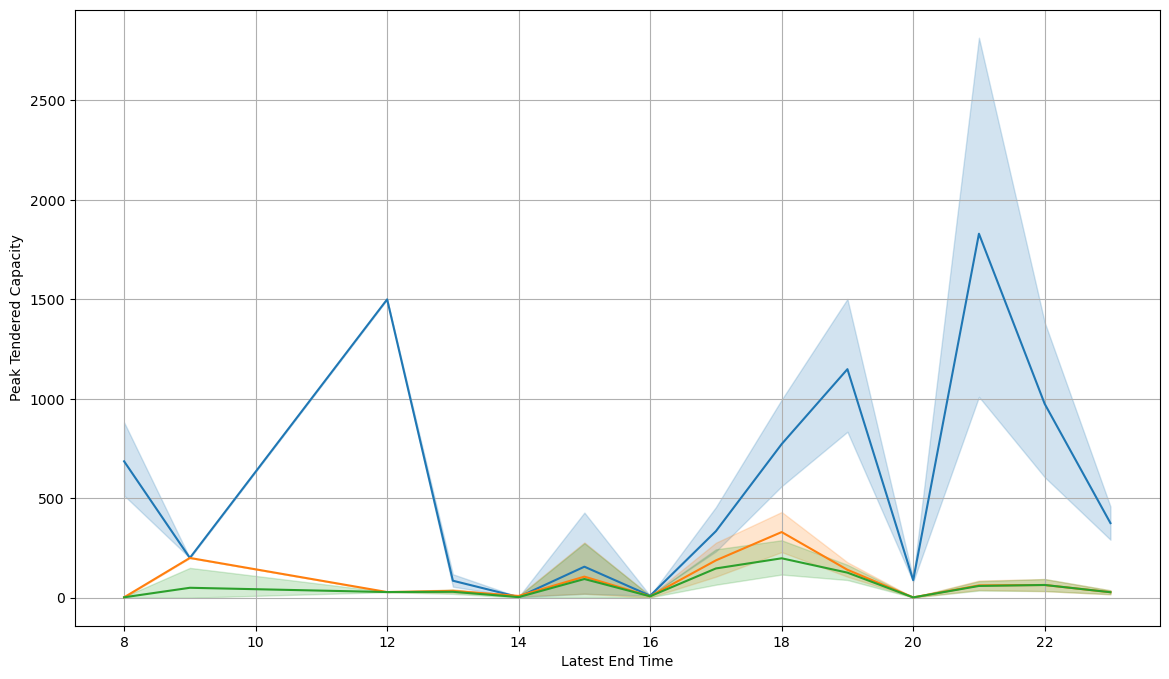

In [37]:
fig, ax = plt.subplots(figsize=(14,8))

for feature in ['Peak Tendered Capacity', 'Offered Capacity [kW]', 'Accepted Capacity [kW]']:
    sns.lineplot(data=data, x=data['Latest End Time'].dt.hour, y=feature, ax=ax, legend=True)
    plt.grid(True)
plt.show()

<Axes: ylabel='Technology Type'>

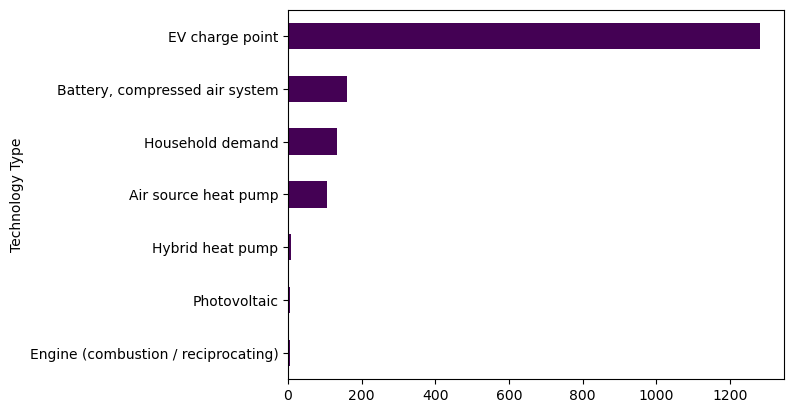

In [43]:
data['Technology Type'].value_counts().sort_values().plot(kind='barh', colormap='viridis')